In [2]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import lightkurve 
from lightkurve import KeplerLightCurve, KeplerTargetPixelFile
from k2sc.standalone import k2sc_lc

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob as g
import pyke
from astropy.io import fits
import lightkurve as lk
from photutils import detect_threshold, detect_sources, deblend_sources
from astropy.stats import gaussian_fwhm_to_sigma
from astropy.convolution import Gaussian2DKernel
import matplotlib.gridspec as gridspec
import scipy

Error initializing plugin EntryPoint('Windows (alt)', 'keyrings.alt.Windows', None, Distribution('keyrings.alt', '3.0')).
Traceback (most recent call last):
  File "/home/pal/.local/lib/python3.6/site-packages/keyring/backend.py", line 190, in _load_plugins
    init_func = ep.load()
  File "/home/pal/.local/lib/python3.6/site-packages/entrypoints.py", line 77, in load
    mod = import_module(self.module_name)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/l

/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='lcs' mode='w' encoding='UTF-8'>
  """Entry point for launching an IPython kernel.
/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='lcs_' mode='w' encoding='UTF-8'>
  # This is added back by InteractiveShellApp.init_path()
PSF centroiding: 100%|██████████| 3561/3561 [00:14<00:00, 252.06it/s]
/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: ResourceWarning: unclosed file <_io.FileIO name='/home/pal/konkoly/automaticaperture/sourcefits/ktwo212469563-c06_lpd-targ.fits' mode='rb' closefd=True>
/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: ResourceWarning: unclosed file <_io.FileIO name='/home/pal/konkoly/automaticaperture/sourcefits/ktwo212469563-c06_lpd-targ.fits' mode='rb' closefd=True>
/home/pal/.local/lib/python3.6/site-packages/astropy/sta

Using default splits [2344] for campaign 5
Starting initial outlier detection
  Flagged 46 ( 1.3%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    0.81 (fap 6.2853e-264 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 10391.177818744687
  DE iteration %3i -ln(L) %4.1f 1 10391.177818744687
  DE iteration %3i -ln(L) %4.1f 2 2111.55577355754
  DE iteration %3i -ln(L) %4.1f 3 2111.55577355754
  DE iteration %3i -ln(L) %4.1f 4 2111.55577355754
  DE iteration %3i -ln(L) %4.1f 5 515.0597770599124
  DE iteration %3i -ln(L) %4.1f 6 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 7 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 8 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 9 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 10 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 11 -502.49726615565885
  DE iteration %3i -ln(L) %4.1f 12 -502.49726615

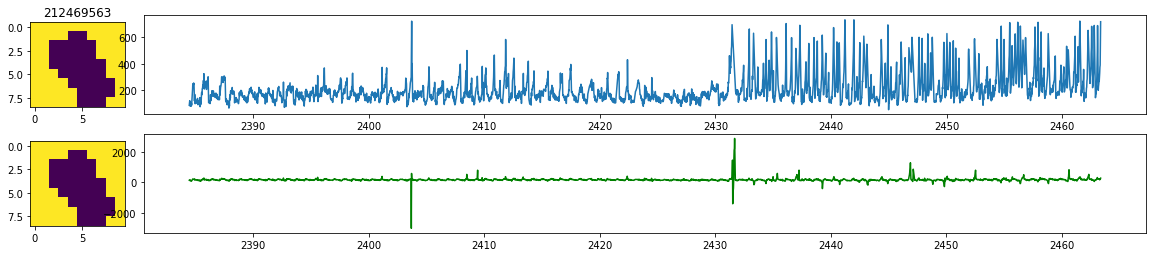

Using default splits [2344] for campaign 5
Starting initial outlier detection
  Flagged 0 ( 0.0%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    0.81 (fap 0.0000e+00 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 -761.229929368455
  DE iteration %3i -ln(L) %4.1f 1 -761.229929368455
  DE iteration %3i -ln(L) %4.1f 2 -1491.7998335427837
  DE iteration %3i -ln(L) %4.1f 3 -1538.5644955311204
  DE iteration %3i -ln(L) %4.1f 4 -1563.0403324395295
  DE iteration %3i -ln(L) %4.1f 5 -1563.0403324395295
  DE iteration %3i -ln(L) %4.1f 6 -1563.0403324395295
  DE iteration %3i -ln(L) %4.1f 7 -1687.3587902346992
  DE iteration %3i -ln(L) %4.1f 8 -1687.3587902346992
  DE iteration %3i -ln(L) %4.1f 9 -1687.3587902346992
  DE iteration %3i -ln(L) %4.1f 10 -1704.9342910544074
  DE iteration %3i -ln(L) %4.1f 11 -1704.9342910544074
  DE iteration %3i -ln(L) %4.1f 12 -

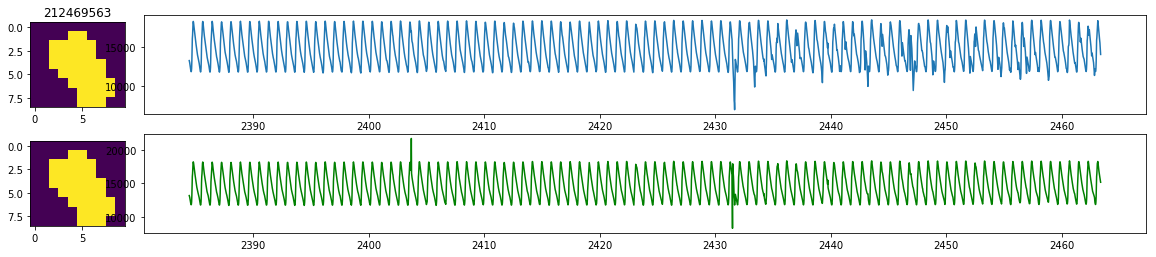

In [126]:
fout = open("lcs",'w')

OURSTARS=g.glob('/home/pal/konkoly/automaticaperture/sourcefits/ktwo*69563*targ.fits')

for OURSTARINDEX, OURSTARLINE in enumerate(OURSTARS):
    
    
    #if OURSTARINDEX==0: # for debug
    if True: # for debug
        try:
            fout2 = open("lcs_"+OURSTARLINE[51:60],"w")

            ourstar=OURSTARLINE

            pyke.kepextract(ourstar,maskfile='ALL',psfcentroid=True,overwrite=True)

            fits_image_filename=ourstar[:-5]+"-kepextract.fits"

            with fits.open(fits_image_filename) as hdul:
                data=hdul[1].data
                time=data['TIME']

            tpf=lk.targetpixelfile.KeplerTargetPixelFile(ourstar)

            fits_image_filename=ourstar[:-5]+"-kepextract.fits"

            with fits.open(fits_image_filename) as hdul:
                data=hdul[1].data
                time=data['TIME']

            tpf=lk.targetpixelfile.KeplerTargetPixelFile(ourstar)

            psfc1=data['PSF_CENTR1']
            psfc2=data['PSF_CENTR2']

            newpsfc=[]
            for index, line in enumerate(psfc1):
                newpsfc.append([psfc1[index],psfc2[index]])
            newpsfc=np.asarray(newpsfc)

            db = DBSCAN(eps=0.3, min_samples=10).fit(newpsfc)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True

            npsfc1=[];npsfc2=[];ntime=[]
            for index, line in enumerate(psfc1):
                if core_samples_mask[index]==True:
                    npsfc1.append(psfc1[index])
                    npsfc2.append(psfc2[index])
                    ntime.append(time[index])

            midnpsfc1 = sum(npsfc1)/len(npsfc1)
            midnpsfc2 = sum(npsfc2)/len(npsfc2)


            for index, line in enumerate(npsfc1):
                if index==0:
                    distsq=((npsfc1[index]-midnpsfc1)**2+(npsfc2[index]-midnpsfc2)**2)
                    closestP=[npsfc1[index],npsfc2[index]]
                if index!=0:
                    distsqprop=((npsfc1[index]-midnpsfc1)**2+(npsfc2[index]-midnpsfc2)**2)
                    if distsqprop<distsq:
                        distsq=distsqprop
                        closestP=[npsfc1[index],npsfc2[index]]

            with open(ourstar[0:-4]+"kepmask") as f:
                maskfile = f.read()
            f.closed
            cords=maskfile.split("|")[5]
            cordlist=cords.split(";")

            cordlistmat=[]
            for index, line in enumerate(cordlist):
                cordlistmat.append(line.split(","))

            cordlistmat_tofloats=[]
            for line in(cordlistmat):
                cordlistmat_tofloats.append([int(line[0]),int(line[1])])

            cordlistmat_inrange=[]
            for line in cordlistmat_tofloats:
                if 0<=line[0] and line[0]<10 and 0<=line[1] and line[1]<10:
                    cordlistmat_inrange.append(line)



            extindex=[np.where(psfc1==np.max(closestP[0]))[0][0],
                      np.where(psfc1==np.min(npsfc1))[0][0],
                      np.where(psfc1==np.max(npsfc1))[0][0],
                      np.where(psfc2==np.min(npsfc2))[0][0],
                      np.where(psfc2==np.max(npsfc2))[0][0]]


            #plt.figure(figsize=(25,25))
            #gs = gridspec.GridSpec(4, 4)
            #
            #ax00 = plt.subplot(gs[0, 0])
            #ax01 = plt.subplot(gs[0, 1])
            #ax02 = plt.subplot(gs[0, 2])
            #ax03 = plt.subplot(gs[0, 3])
            #
            #ax10 = plt.subplot(gs[1, 0])
            #ax11 = plt.subplot(gs[1, 1])
            #ax12 = plt.subplot(gs[1, 2])
            #ax13 = plt.subplot(gs[1, 3])
            #
            #
            #ax20 = plt.subplot(gs[2, 0])
            #ax21 = plt.subplot(gs[2, 1])
            #ax22 = plt.subplot(gs[2, 2])
            #ax23 = plt.subplot(gs[2, 3])
            #
            #ax30 = plt.subplot(gs[3, 0])
            #ax31 = plt.subplot(gs[3, 1])
            #ax32 = plt.subplot(gs[3, 2])
            #ax33 = plt.subplot(gs[3, 3])
            #
            #
            #ax00.scatter(psfc1,psfc2,marker='+',c='r')
            #ax00.scatter(npsfc1,npsfc2,marker='+')
            #ax00.set_title("PHOTOCENTER CLUSTERING",fontsize=16)
            #
            #ax01.scatter(psfc1,psfc2,marker='+',c=time)
            #ax01.set_title("PHOTOCENTER TIME EVOLUTION",fontsize=16)       
            #
            #ax02.scatter(npsfc1,npsfc2,marker='+',c=ntime)
            #ax02.set_title("MAIN CLUSTER",fontsize=16)
            #ax02.scatter(np.max(npsfc1),npsfc2[npsfc1.index(np.max(npsfc1))],c='r')
            #ax02.axvline(x=np.max(npsfc1),c='k')
            #ax02.scatter(np.min(npsfc1),npsfc2[npsfc1.index(np.min(npsfc1))],c='r')
            #ax02.axvline(x=np.min(npsfc1),c='k')
            #ax02.scatter(npsfc1[npsfc2.index(np.max(npsfc2))],np.max(npsfc2),c='r')
            #ax02.axhline(np.max(npsfc2),c='k')
            #ax02.scatter(npsfc1[npsfc2.index(np.min(npsfc2))],np.min(npsfc2),c='r')
            #ax02.axhline(np.min(npsfc2),c='k')
            #ax02.scatter(closestP[0],closestP[1],c='R',s=150)
            #
            #
            #    
            #ax03.set_title("TPF MIDDLE w/ APFIT",fontsize=16)
            #ax10.set_title("TPF @ X MIN w/ APFIT",fontsize=16)
            #ax11.set_title("TPF @ X MAX w/ APFIT",fontsize=16)
            #ax12.set_title("TPF @ Y MIN w/ APFIT",fontsize=16)
            #ax13.set_title("TPF @ Y MAX w/ APFIT",fontsize=16)

            countergrid=np.asarray([[0]*len(tpf.flux[0][0]) for n in range(len(tpf.flux[0]))])
            #axlist=[ax03,ax10,ax11,ax12,ax13]



            for i, l in enumerate(extindex):

                tpfdata=tpf.flux[i]

                threshold = detect_threshold(tpfdata, snr=1.8)
                sigma = 3.0 * gaussian_fwhm_to_sigma    # FWHM = 3.
                kernel = Gaussian2DKernel(sigma, x_size=1, y_size=1)
                kernel.normalize()
                segm = detect_sources(tpfdata, threshold, npixels=1, filter_kernel=kernel)
                segm_deblend = deblend_sources(tpfdata, segm, npixels=5, filter_kernel=kernel)

                apx=[];apy=[]
                for x in range(len(segm.data)):
                    for y in range(len(segm.data[0])):
                        if segm.data[x][y]!=0:
                            apx.append(x)
                            apy.append(y)

            #    axlist[i].imshow(tpfdata)
            #    axlist[i].scatter(apy,apx,c='r',s=150)

                countergrid += segm.data


                attilamask_x=[];attilamask_y=[]
                for each in cordlistmat_inrange:
                    attilamask_x.append(each[0])
                    attilamask_y.append(each[1])

            #    ax20.imshow(countergrid)
            #    ax20.scatter(attilamask_y,attilamask_x,c='k',s=150)
            #    ax20.set_title("PIXEL SELECTION w/ 5 FRAMES",fontsize=16)


            countergrid_all=np.asarray([[0]*len(tpf.flux[0][0]) for n in range(len(tpf.flux[0]))])


            for i in range(len(tpf.flux)):


                if i in np.where(core_samples_mask==True)[0]:

                    tpfdata=tpf.flux[i]

                    threshold = detect_threshold(tpfdata, snr=1.8)
                    sigma = 3.0 * gaussian_fwhm_to_sigma    # FWHM = 3.
                    kernel = Gaussian2DKernel(sigma, x_size=1, y_size=1)
                    kernel.normalize()
                    segm = detect_sources(tpfdata, threshold, npixels=1, filter_kernel=kernel)
                    segm_deblend = deblend_sources(tpfdata, segm, npixels=5, filter_kernel=kernel)

                    apx=[];apy=[]
                    for x in range(len(segm.data)):
                        for y in range(len(segm.data[0])):
                            if segm.data[x][y]!=0:
                                apx.append(x)
                                apy.append(y)

                    countergrid_all += segm.data


            #ax21.imshow(countergrid_all)
            #ax21.scatter(attilamask_y,attilamask_x,c='r')
            #ax21.set_title("PIXEL SELECTION w/ ALL FRAMES", fontsize=16)
            #    
            #limitc=(countergrid_all>0)
            #ax22.scatter(attilamask_y,attilamask_x,c='r')
            #ax22.imshow(limitc.astype(int)) 
            #ax22.set_title("EVER SELECTED",fontsize=16)
            #
            #limitc=(countergrid_all>len(tpf.flux)/50)
            #ax23.scatter(attilamask_y,attilamask_x,c='r')
            #ax23.imshow(limitc.astype(int)) 
            #ax23.set_title("THRESHOLD1",fontsize=16)
            #
            #limitc=(countergrid_all>len(tpf.flux)/20)
            #ax30.scatter(attilamask_y,attilamask_x,c='r')
            #ax30.imshow(limitc.astype(int)) 
            #ax30.set_title("THRESHOLD2",fontsize=16)
            #
            #limitc=(countergrid_all>len(tpf.flux)/10)
            #ax31.scatter(attilamask_y,attilamask_x,c='r')
            #ax31.imshow(limitc.astype(int)) 
            #ax31.set_title("THRESHOLD3",fontsize=16)
            #
            #limitc=(countergrid_all>len(tpf.flux)/5)
            #ax32.scatter(attilamask_y,attilamask_x,c='r')
            #ax32.imshow(limitc.astype(int)) 
            #ax32.set_title("THRESHOLD4",fontsize=16)
            #
            #limitc=(countergrid_all>len(tpf.flux)/2.5)
            #ax33.scatter(attilamask_y,attilamask_x,c='r')
            #ax33.imshow(limitc.astype(int)) 
            #ax33.set_title("THRESHOLD5",fontsize=16)
            #
            #
            #pngname=ourstar+"_apertures_after_clustering.png"
            #plt.savefig(pngname)    
            #
            #    
            #plt.show()


            limitc=(countergrid_all>len(tpf.flux)/2.5)
            #plt.scatter(attilamask_y,attilamask_x,c='r')
            #plt.imshow(limitc.astype(int)) 
            #plt.title("THRESHOLD5",fontsize=16)
            labelgrid, num_features = scipy.ndimage.measurements.label(limitc)



            gridfill=np.asarray([[0]*len(tpf.flux[0][0]) for n in range(len(tpf.flux[0]))])
            for each in cordlistmat_inrange:
                gridfill[each[0],each[1]]=1

            for i in range(num_features+1):
                plt.figure(figsize=(20,4))
                gs = gridspec.GridSpec(2, 10)
                ax0 = plt.subplot(gs[0, 0])
                ax1 = plt.subplot(gs[0, 1:])
                ax2 = plt.subplot(gs[1, 0])
                ax3 = plt.subplot(gs[1, 1:])

                if i!=num_features+1:

                    ax0.imshow(labelgrid==(i))
                    ax2.imshow(labelgrid==(i))
                    ax0.set_title(ourstar[51:60])

                    user_lc = tpf.to_lightcurve(aperture_mask=labelgrid==(i))
                    user_lc = user_lc.remove_nans().remove_outliers()

                    #fout.write("ID:"+ourstar[51:60]+" ")
                    #for each in user_lc.time:
                    #    fout.write(str(each)+" ")
                    #fout.write(str(labelgrid==(i)))
                    #fout.write("#### \n")


                    ax1.plot(user_lc.time,user_lc.flux)


                    try:
                        lc = tpf.to_lightcurve(aperture_mask=(labelgrid==(i)).astype(bool)) # load some data either as a tpf or just straight up as a lightcurve
                        lc.primary_header = tpf.hdu[0].header
                        lc.data_header = tpf.hdu[1].header
                        lc.pos_corr1 = tpf.hdu[1].data['POS_CORR1'][tpf.quality_mask]
                        lc.pos_corr2 = tpf.hdu[1].data['POS_CORR2'][tpf.quality_mask]
                        lc.__class__ = k2sc_lc
                        lc.k2sc()

                        #declc=lc.corr_flux-lc.tr_position + np.nanmedian(lc.tr_position)
                        ax3.plot(lc.time,lc.corr_flux,c='g')
                        #ax3.set_ylim([np.mean(declc)-3*np.std(declc),np.mean(declc)+3*np.std(declc)])


                        fout.write("ID:"+ourstar[51:60]+"BJD: ")
                        for each in lc.time:
                            fout.write(str(each)+" ")
                        fout.write("\n")
                        fout.write("flux: ")
                        for each in lc.corr_flux:
                            fout.write(str(each)+" ")    
                        fout.write(str((labelgrid==(i)).astype(bool)))
                        fout.write("#### \n")

                        fout2.write("ID:"+ourstar[51:60]+"BJD: ")
                        for each in lc.time:
                            fout2.write(str(each)+" ")
                        fout2.write("\n")
                        fout2.write("flux: ")
                        for each in lc.corr_flux:
                            fout2.write(str(each)+" ")    
                        fout2.write(str((labelgrid==(i)).astype(bool)))
                        fout2.write("#### \n")
                        
                        
                        
                        pngname=ourstar+"NUM_"+str(i)+"_apertures_and_lightcurves.png"
                        plt.savefig(pngname)  
                        plt.show()

                    except ValueError:
                        fout.write("ID:"+ourstar[51:60]+" "+"ValueError")




    #           if i==(num_features+2):
    #               
    #               plt.figure(figsize=(20,2))
    #               gs = gridspec.GridSpec(1, 10)
    #               ax0 = plt.subplot(gs[0, 0])
    #               ax1 = plt.subplot(gs[0, 1:])
    #               
    #               gridfill=np.asarray([[0]*len(tpf.flux[0][0]) for n in range(len(tpf.flux[0]))])
    #               for each in cordlistmat_inrange:
    #                   gridfill[each[0],each[1]]=1
    #               ax0.imshow(gridfill)
    #               ax0.set_title(ourstar[51:60])
    #               ax2.imshow(labelgrid==(i))
    #               user_lc = tpf.to_lightcurve(aperture_mask=gridfill.astype(bool))
    #               user_lc = user_lc.remove_nans().remove_outliers()
    #               
    #               fout.write("ID:"+ourstar[51:60]+" ")
    #               for each in user_lc.time:
    #                   fout.write(str(each)+" ")
    #               fout.write(str(gridfill.astype(bool)))
    #               fout.write("#### \n")
    #               
    #               ax1.plot(user_lc.time,user_lc.flux,c='r')
    #               ax1.set_ylim([np.mean(declc)-3*np.std(declc),np.mean(declc)+3*np.std(declc)])
    #               


    #                pngname=ourstar+"NUM_"+str(i)+"_apertures_and_lightcurves.png"
    #                plt.savefig(pngname)  
    #                plt.show()

                if i==(num_features+1):

                    plt.figure(figsize=(20,2))
                    gs = gridspec.GridSpec(1, 10)
                    ax0 = plt.subplot(gs[0, 0])
                    ax1 = plt.subplot(gs[0, 1:])

                    gridfill=np.asarray([[0]*len(tpf.flux[0][0]) for n in range(len(tpf.flux[0]))])
                    for each in cordlistmat_inrange:
                        gridfill[each[0],each[1]]=1
                    ax0.imshow(gridfill)
                    ax0.set_title(ourstar[51:60])
                    ax2.imshow(labelgrid==(i))
                    user_lc = tpf.to_lightcurve(aperture_mask=gridfill.astype(bool))
                    user_lc = user_lc.remove_nans().remove_outliers()

                    fout.write("ID:"+ourstar[51:60]+"BJD: ")
                    for each in user_lc.time:
                        fout.write(str(each)+" ")
                    fout.write("\n")
                    fout.write("flux: ")
                    for each in user_lc.flux:
                        fout.write(str(each)+" ")    
                    fout.write(str(gridfill.astype(bool)))
                    fout.write("#### \n")
                    
                    fout2.write("ID:"+ourstar[51:60]+"BJD: ")
                    for each in user_lc.time:
                        fout2.write(str(each)+" ")
                    fout2.write("\n")
                    fout2.write("flux: ")
                    for each in user_lc.flux:
                        fout2.write(str(each)+" ")    
                    fout2.write(str(gridfill.astype(bool)))
                    fout2.write("#### \n")
                    
                    
                    
                    ax1.plot(user_lc.time,user_lc.flux,c='r')


                    pngname=ourstar+"NUM_"+str(i)+"_apertures_and_lightcurves.png"
                    plt.savefig(pngname)
                    plt.show()
                    
            fout2.close()
        except Exception:
            fout.write("Except:"+OURSTARLINE+" \n")
            print("exceptexception")
fout.close()

In [3]:
OURSTARS=g.glob('/home/pal/konkoly/automaticaperture/sourcefits/ktwo*69563*targ.fits')


In [4]:
OURSTARS

['/home/pal/konkoly/automaticaperture/sourcefits/ktwo212469563-c06_lpd-targ.fits']

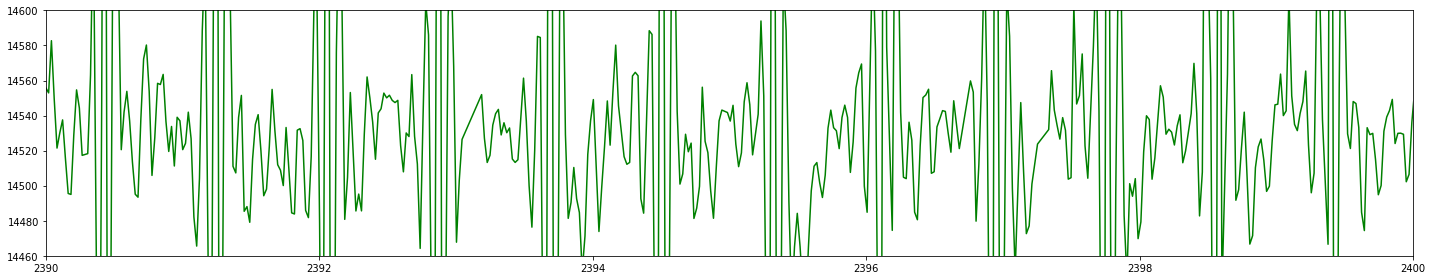

In [47]:
plt.figure(figsize=(20,4))
plt.plot(lc.time,lc.corr_flux-lc.tr_time + np.nanmedian(lc.tr_time),c='g')
plt.ylim([14460,14600])
plt.xlim([2390,2400])
plt.tight_layout()

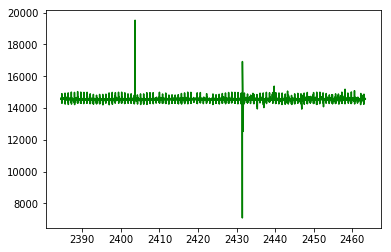

In [11]:
plt.plot(lc.time,lc.corr_flux-lc.tr_time + np.nanmedian(lc.tr_time),c='g')


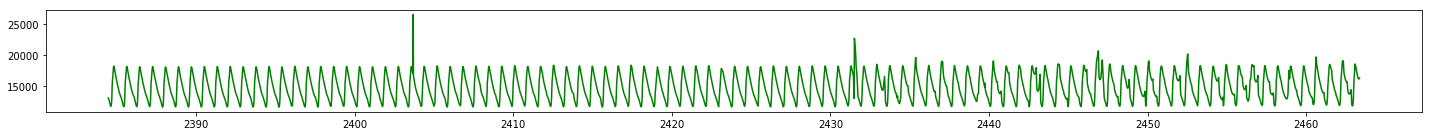

In [29]:
plt.figure(figsize=(20,2))
plt.plot(lc.time,lc.corr_flux-lc.tr_position + np.nanmedian(lc.tr_position),c='g')
plt.tight_layout()

In [30]:
declc=lc.corr_flux-lc.tr_position + np.nanmedian(lc.tr_position)

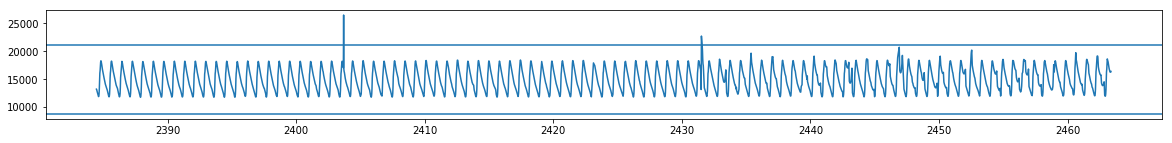

In [38]:
plt.figure(figsize=(20,2))
plt.plot(lc.time,declc)
plt.axhline(y=np.mean(declc)+3*np.std(declc))
plt.axhline(y=np.mean(declc)-3*np.std(declc))

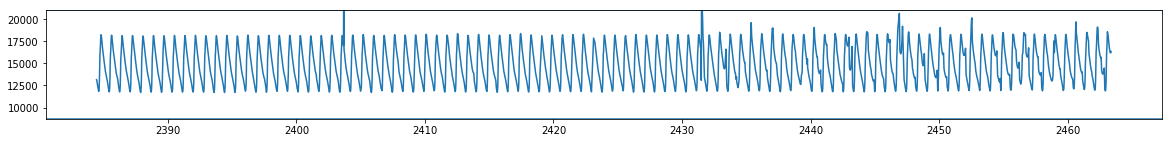

In [40]:
plt.figure(figsize=(20,2))
plt.plot(lc.time,declc)
plt.ylim([np.mean(declc)-3*np.std(declc),np.mean(declc)+3*np.std(declc)])
plt.axhline(y=np.mean(declc)+3*np.std(declc))
plt.axhline(y=np.mean(declc)-3*np.std(declc))

Using default splits [2344] for campaign 5
Starting initial outlier detection
  Flagged 46 ( 1.3%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    0.81 (fap 6.2853e-264 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 10391.177818744687
  DE iteration %3i -ln(L) %4.1f 1 10391.177818744687
  DE iteration %3i -ln(L) %4.1f 2 2111.55577355754
  DE iteration %3i -ln(L) %4.1f 3 2111.55577355754
  DE iteration %3i -ln(L) %4.1f 4 2111.55577355754
  DE iteration %3i -ln(L) %4.1f 5 515.0597770599124
  DE iteration %3i -ln(L) %4.1f 6 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 7 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 8 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 9 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 10 -457.7225171074047
  DE iteration %3i -ln(L) %4.1f 11 -502.49726615565885
  DE iteration %3i -ln(L) %4.1f 12 -502.49726615

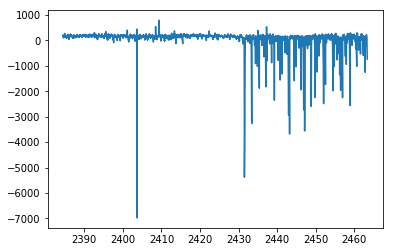

In [51]:
lc0 = tpf.to_lightcurve(aperture_mask=(labelgrid==(0)).astype(bool)) # load some data either as a tpf or just straight up as a lightcurve
lc0.primary_header = tpf.hdu[0].header
lc0.data_header = tpf.hdu[1].header
lc0.pos_corr1 = tpf.hdu[1].data['POS_CORR1'][tpf.quality_mask]
lc0.pos_corr2 = tpf.hdu[1].data['POS_CORR2'][tpf.quality_mask]
lc0.__class__ = k2sc_lc
lc0.k2sc()

declc=lc0.corr_flux-lc0.tr_position + np.nanmedian(lc0.tr_position)
plt.plot(lc0.time,declc)

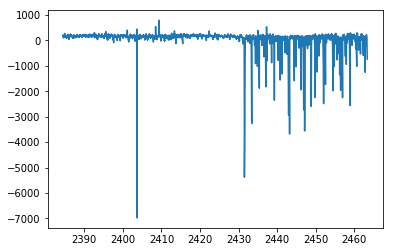

In [53]:

declc=lc0.corr_flux-lc0. + np.nanmedian(lc0.tr_position)
plt.plot(lc0.time,declc)

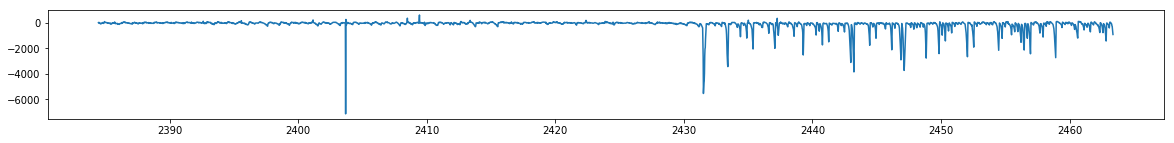

In [65]:
plt.figure(figsize=(20,2))
plt.plot(lc0.time,lc0.corr_flux-lc0.tr_position)

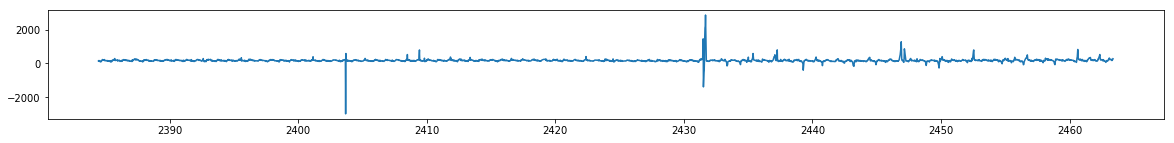

In [68]:
plt.figure(figsize=(20,2))
plt.plot(lc0.time,lc0.corr_flux)

In [71]:
lc1 = tpf.to_lightcurve(aperture_mask=(labelgrid==(1)).astype(bool)) # load some data either as a tpf or just straight up as a lightcurve
lc1.primary_header = tpf.hdu[0].header
lc1.data_header = tpf.hdu[1].header
lc1.pos_corr1 = tpf.hdu[1].data['POS_CORR1'][tpf.quality_mask]
lc1.pos_corr2 = tpf.hdu[1].data['POS_CORR2'][tpf.quality_mask]
lc1.__class__ = k2sc_lc
lc1.k2sc()


Using default splits [2344] for campaign 5
Starting initial outlier detection
  Flagged 0 ( 0.0%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    0.81 (fap 0.0000e+00 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 -761.229929368455
  DE iteration %3i -ln(L) %4.1f 1 -761.229929368455
  DE iteration %3i -ln(L) %4.1f 2 -1491.7998335427837
  DE iteration %3i -ln(L) %4.1f 3 -1538.5644955311204
  DE iteration %3i -ln(L) %4.1f 4 -1563.0403324395295
  DE iteration %3i -ln(L) %4.1f 5 -1563.0403324395295
  DE iteration %3i -ln(L) %4.1f 6 -1563.0403324395295
  DE iteration %3i -ln(L) %4.1f 7 -1687.3587902346992
  DE iteration %3i -ln(L) %4.1f 8 -1687.3587902346992
  DE iteration %3i -ln(L) %4.1f 9 -1687.3587902346992
  DE iteration %3i -ln(L) %4.1f 10 -1704.9342910544074
  DE iteration %3i -ln(L) %4.1f 11 -1704.9342910544074
  DE iteration %3i -ln(L) %4.1f 12 -

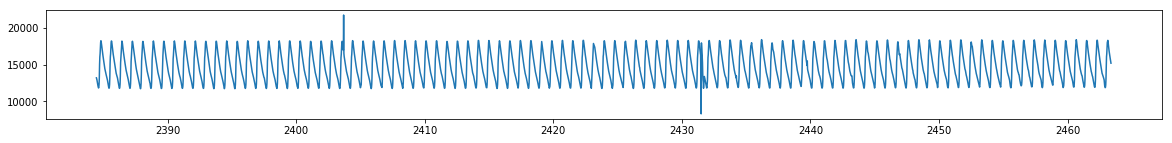

In [73]:
plt.figure(figsize=(20,2))
plt.plot(lc1.time,lc1.corr_flux)

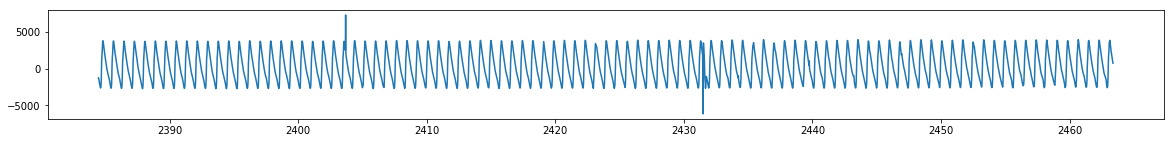

In [75]:
plt.figure(figsize=(20,2))
plt.plot(lc1.time,lc1.flux-lc1.tr_position)

In [93]:
fout=open("probalcs","w")
for x in range(4):
    try:
        x==fff
    except Exception:
        fout.write("Except:"+OURSTARLINE+" \n")
fout.close()

In [94]:
!cat probalcs

Except:/home/pal/konkoly/automaticaperture/sourcefits/ktwo212469563-c06_lpd-targ.fits 
Except:/home/pal/konkoly/automaticaperture/sourcefits/ktwo212469563-c06_lpd-targ.fits 
Except:/home/pal/konkoly/automaticaperture/sourcefits/ktwo212469563-c06_lpd-targ.fits 
Except:/home/pal/konkoly/automaticaperture/sourcefits/ktwo212469563-c06_lpd-targ.fits 


In [111]:
fout3 = open("lcs_"+OURSTARLINE[62:-18],"w")
fout3.write("wwww")
fout3.close()

In [125]:
OURSTARLINE[51:60]

'212469563'